In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Preparación datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

#Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Introducción

En esta practica buscamos poner en práctica todo lo aprendido todo lo visto en APC tanto en las clases de teoria como en las sesiones de prácticas. Queremos poner en práctica nuestro conocimiento de aprendizaje computacional para llevar a cabo una investigación sobre un dataset que se nos ha asignado.

## Carga del dataset y análisis de los datos

En mi caso el dataset que voy a investigar contiene los datos sobre algunos de los videojuegos que se vendieron durante el año 2019 en múltiples plataformas. Mediante métodos de classificación de aprendizaje computacional trataré de ver que plataformas han sido más utilizadas durante ese año y que juegos tubieron un mayor impacto para la industria de los videojuegos, así como la posible correlación que puedan tener las diferentes variables del dataset.

In [2]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('vgsales-12-4-2019.csv')
dataset.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


Como vemos nuestro dataset contiene diferentes variables que nos aportan información sobre la venta de algunos de los videojuegos en 2019. A continuación lo que vamos a hacer es juntar todas las ventas en una única columna para facilitar su estudio y eliminar las columnas que no tienen entradas:

In [3]:
dataset['Total_Sales'] = dataset.Total_Shipped.fillna(0) + dataset.Global_Sales.fillna(0)
dataset = dataset[dataset.Total_Sales != 0]
dataset = dataset.drop(['Total_Shipped','Global_Sales',], axis=1)
dataset = dataset.sort_values(by=['Total_Sales'], ascending=False)

dataset.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,37.14
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,36.60
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,33.09


Nuestro dataset contiene una lista de videojuegos con sus ventas y las críticas tanto de los usuarios como de los críticos:

  ·  Rank - Ranking de ventas totales
  
  ·  Nombre - Nombre del juego
  
  ·  Plataforma: plataforma del juego (es decir, PC, PS4, XOne, etc.)
  
  ·  Género - Género del juego
  
  ·  Clasificación ESRB - Clasificación ESRB del juego
  
  ·  Editor - Editor del juego
  
  ·  Desarrollador - Desarrollador del juego
  
  ·  Puntaje crítico: puntaje crítico del juego de 10
  
  ·  Puntuación del usuario: los usuarios puntúan el juego desde 10
  
  ·  Total_Sales: Valor total de todas las ventas
  
  ·  NA_Sales - Ventas en América del Norte (en millones)
  
  ·  PAL_Sales - Ventas en Europa (en millones)
  
  ·  JP_Sales - Ventas en Japón (en millones)
  
  ·  Other_Sales - Ventas en el resto del mundo (en millones)
  
  ·  Año - Año de lanzamiento del juego.
  
  Como vemos hay multiples atributos interesantes para investigar. A primera vista podemos intuir que no habrà mucha relación entre los datos, puesto que se trata de un dataset donde la información no se basa en lo que ya tenemos sinó en lo que està de moda en cada región y cada momento. Es un dataset dificil de estudiar hablando en tèrminos de correlación entre los datos. 

Antes de comenzar a estudiar nuestros datos debemos dejarlos de forma que se pueda realizar un estudio sobre ellos, es lo que se conoce como la normalización de los datos. Vamos a comprobar la cantidad de nulls que tiene nuestro dataset, para luego eliminarlos y poder limpiarlo de valores que distorsionan la realidad.

VGChartz_Score    19862
User_Score        19624
Vgchartzscore     19335
Last_Update       15192
Critic_Score      15156
JP_Sales          13071
PAL_Sales          7737
NA_Sales           7085
ESRB_Rating        5937
Other_Sales        5352
Year                  3
Developer             2
Platform              0
Name                  0
basename              0
Genre                 0
Total_Sales           0
Publisher             0
img_url               0
url                   0
status                0
Rank                  0
dtype: int64


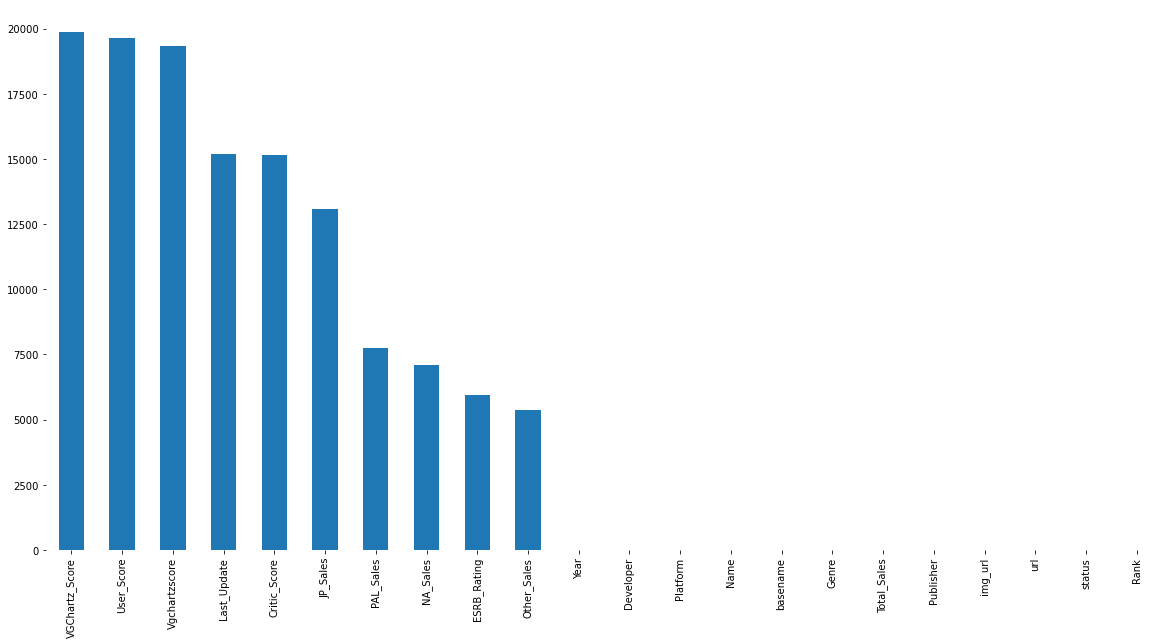

<AxesSubplot:>

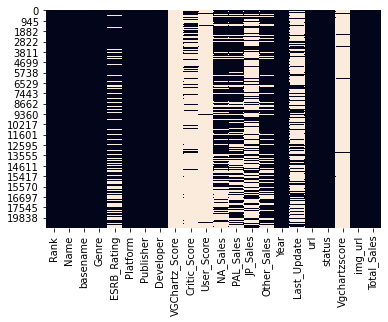

In [4]:
N_null = dataset.isnull().sum()
N_null.sort_values(inplace=True, ascending=False)
N_null.plot(kind='bar',stacked=True,figsize=(20,10))
sns.despine(left=True, bottom=True)
print(N_null)
plt.show()
sns.heatmap(dataset.isnull(), cbar=False)

Como hemos visto, algunas de las variables contienen una gran cantidad de nulls, lo que dificulta el estudio. Lo que vamos a hacer a continuación es deshacernos de todas las variables que contienen una gran cantidad de null puesto que normalizar los datos añade error en los valores. Si tratàsemos de normalizar unan gran cantidad de datos estaríamos añadiendo demasiados valores erroneos que modificarían los resultados. 

In [5]:
dataset = dataset.drop(['Critic_Score', 'Last_Update', 'Vgchartzscore', 'User_Score', 'VGChartz_Score', 'img_url', 'url', 'basename', 'ESRB_Rating', 'JP_Sales', 'PAL_Sales', 'NA_Sales', 'Other_Sales'], axis=1)

In [6]:
N_null = dataset.isnull().sum()
N_null.sort_values(inplace=True, ascending=False)
print(N_null)

Year           3
Developer      2
Total_Sales    0
status         0
Publisher      0
Platform       0
Genre          0
Name           0
Rank           0
dtype: int64


Ahora que nuestros datos ya no tienen variables con grandes valores null vamos a normalizar los datos que tengan pocos valores así. 
Eliminamos los NaN para evitar futuros errores y sustituimos los nulls de Year y developer ya que tienen una baja cantidad de nulls i el error que introduciremos a los datos no es elevado:

In [7]:
dataset = dataset.dropna()
dataset["Year"].fillna(dataset["Year"].mode(), inplace=True)
dataset["Developer"].fillna(dataset["Developer"].mode(), inplace=True)
N_null = dataset.isnull().sum()
N_null.sort_values(inplace=True, ascending=False)
print(N_null)


Total_Sales    0
status         0
Year           0
Developer      0
Publisher      0
Platform       0
Genre          0
Name           0
Rank           0
dtype: int64


Ahora podemos decir que tenemos un conjunto de datos "limpios" y listos para ser analizados: 

<AxesSubplot:>

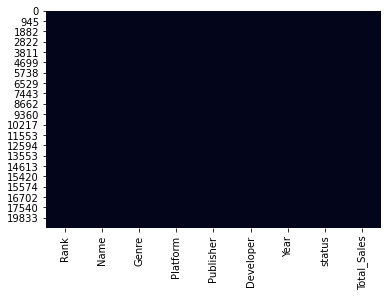

In [8]:
sns.heatmap(dataset.isnull(), cbar=False)

## PREPARACION DE LOS DATOS

Una vez llegados a este punto existen muchas formas de realizar investigaciones sobre datasets y multiples conclusiones a las que llegar dependiendo de cual se aplique. En nuestro caso lo que buscamos es aplicar algoritmos de classificación por lo que vamos a realizar un procesamiento de los datos adaptado a lo que buscamos. Nuestro objetivo final descubrir si existe algún tipo de correlación entre las variables del dataset con la finalidad de poder classificarlas en función de esa relación. 

Lo primero que vamos a hacer es estudiar la correlación que existe entre las diferentes variables de nuestro dataset ya normalizado. 

A continuación vamos a mostrar la matriz de correlación entra las variables de nuestro dataset normalizado: 

<AxesSubplot:>

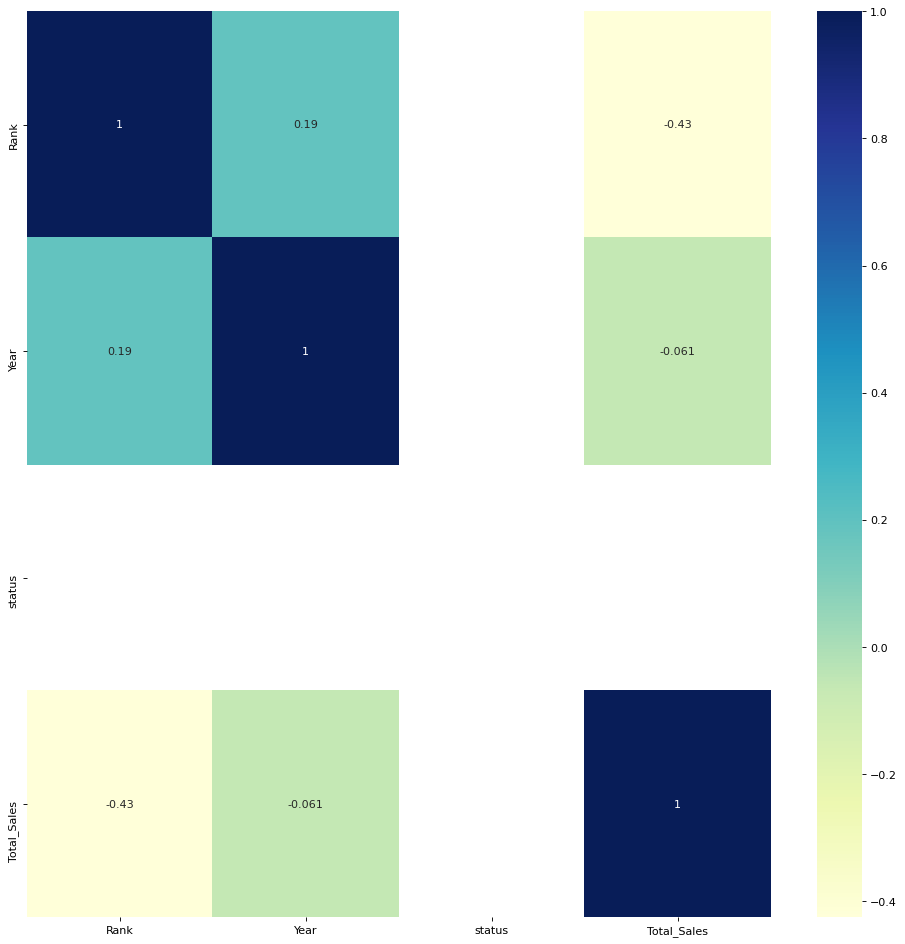

In [9]:
plt.figure(figsize=(15, 15), dpi=80)
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

Antes de continuar hay algo que debemos tener en cuenta, y es que este tipo de correlación no es capaz de trabajar con variables de tipo string, por lo que no nos permite ver la correlación con ellas. Para poder solucionar esto lo que vamos a hacer es convertir esas variables de tipo string en variables de tipo int, de forma que podamos ver si existe una correlación entre ellas también o no.

Como podemos ver, algunas de las variables que tenemos en el dataset no se muestran en nuestra tabla de correlación. Esto se debe a lo que se acaba de comentar, por lo que vamos a proceder a realizar la sustitución los valores string por int:

In [10]:
LabEncoder = preprocessing.LabelEncoder()
atributes = ['Name', 'Genre', 'Platform','Publisher', 'Developer']
for atribute in atributes:
    LabEncoder.fit(dataset[atribute])
    dataset[atribute] = LabEncoder.transform(dataset[atribute])
print(dataset.head())

   Rank   Name  Genre  Platform  Publisher  Developer    Year  status  \
0     1  13258     17        34        564       1931  2006.0       1   
1     2  11212     10        14        564       1931  1985.0       1   
2     3   6713     12        34        564       1931  2008.0       1   
3     4   8782     15        18        602       2031  2017.0       1   
4     5  13260     17        34        564       1931  2009.0       1   

   Total_Sales  
0        82.86  
1        40.24  
2        37.14  
3        36.60  
4        33.09  


Si nos volvemos a fijar en la matriz de correlación anterior, podemos apreciar algo más a parte de la falta de variables. Si detenemos un momento y analizamos, vemos que se trata de una matriz extraña, la fila y columna de la variable "status" aparecen completamente en blanco, mostrando una correlación de 0 absoluto con el resto de variables. 

Si vamos a nuestro dataset inicial y analizamos los datos, podemos observar que el valor de la variable "status" es siempre 1. Esto significa que lógicamente no va a tener ningún tipo de relación con el resto de variables, puesto que suban, bajen o se mantengan, los valores de status no van a verse afectados. Esto hace que se trate de una variable absurda en nuestra investigación, por lo que vamos a proceder a eliminarla del dataset. 

In [11]:
dataset = dataset.drop(['status'], axis=1)

Una vez hemos eliminado esta variable y hemos realizado el cambio de variables String por Int podemos volver mostrar la matriz de correlación y ver que ahora si que tiene la forma que podiamos imaginar en un principio:

Cantidad de géneros diferentes:  20


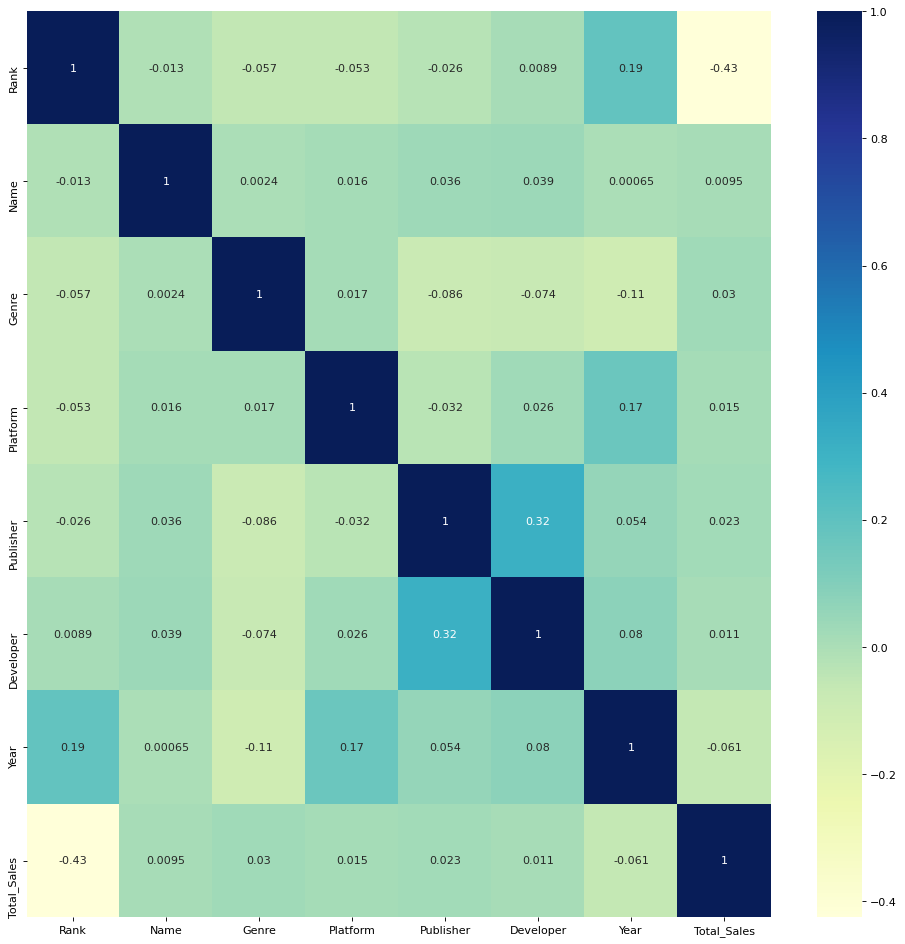

In [12]:
plt.figure(figsize=(15, 15), dpi=80)
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

print("Cantidad de géneros diferentes: ", len(dataset['Genre'].unique()))

*Destacar que encima de la matriz de correlación anterior se muestra la cantidad de géneros que contienen el dataset.*

Una vez realizado este cambio ya podemos proceder con la matriz de correlación de nuestras variables. Analizando la matriz y sus colores podemos ver que las variables tienen poca correlación entre ellas como teorizábamos al inicio del documento. 

Vemos que las variables que més correlación llegan a tener entre ellas son los Desarrolladores con los Publicadores (lógico ya que si miramos los datos vemosq que son prácticamente lo mismo). Otras variables que pueden guardar cierta relación son las Plataformas y el año de salida, cosa que tiene más sentido. Si lo pensamos con detenimiento cuando un año una Plataforma es la destacada se suelen sacar más videojuegos para ella. 

Aún así nosotros basaremos nuestra investigación en el género. 

## ENTRENAMIENTO DE LOS MODELOS

En esta sección vamos a llevar a cabo todo lo que tiene que ver con modelos de classificación y su entrenamiento.
En primera instáncia vamos a dividir los datos en datos de entrenamiento y datos de validación. Hemos decidido hacerlo en un 80 - 20 respectivamente puesto que es la división más utilizada por lo general. 

Vamos a realizar el estudio sobre el dataset con los ID de "genre" puesto que como hemos dicho al ser string no puede detectarlos para trabajar correctamente. 

Para hacerlo eliminamos la variable "Genre" del dataset completo puesto que es la variable que queremos investigar y vamos a metrla sola en un nuevo dataset: 

In [13]:
X = dataset.drop(['Genre'], axis=1)
Y = dataset['Genre']

print(Y.head())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

Sscaler = StandardScaler()
Sscaler.fit(X_train)

X_train = Sscaler.transform(X_train)
X_test = Sscaler.transform(X_test)

0    17
1    10
2    12
3    15
4    17
Name: Genre, dtype: int32


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
Sscaler = StandardScaler()
Sscaler.fit(X_train)
X_train = Sscaler.transform(X_train)
X_test = Sscaler.transform(X_test)

## Aplicación de modelos de clasificación y sus hyperparámetros
Los hiperparámetros escogidos en los modelso a continuación han ido siendo testeados has ver con que valores podiamos mostrar lo que buscávamos de la manera más comprensible. 

## Modelo: Decision Tree
Vamos a comenzar con el modelo decision tree. En este caso aplicamos dos tipos de hypercriterios para ver cual de ellos classifica mejor y cual nos puede ser más útil para este trabajo. 

In [15]:
dt = DecisionTreeClassifier(random_state=0, criterion='gini')
dt.fit(X_train, Y_train)
print ("F1 score: ", f1_score(Y_test, dt.predict(X_test), average='macro'))
print("Criterion:", 'Gini')
print("")

dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, Y_train)
print ("F1 score: ", f1_score(Y_test, dt.predict(X_test), average='macro'))
print("Criterion:", 'Entropy')
print("")

F1 score:  0.3609211428383207
Criterion: Gini

F1 score:  0.32092088342272457
Criterion: Entropy



En el caso de Decision Tree y tras realizar diversas ejecuciones, se puede apreciar que la mayoria de las veces el hyperparámetro "gini" nos da un mejor resultado que "entropy". Aun así, hay que destacar que ambos modelos dan un resultado bastante bajo y parecido. Esto se debe a que como comentabamos anteriormente, la correlación que puedan tener las variables con el género es baja, puesto que los géneros de un videojuego no aparecen más dependiendo de un año o de una plataforma. Esto sucede por cosas como que muchas de las plataformas comparten videojuegos o que depende de lo que esté de moda en el momento. 

## Modelo: Logistic Regression

Para este modelo, tras haber probado con multiples hiperparámetros creemos que los que más muestran lo que sucede con los datos son [0.1, 10, 100, 1000].
Vemos que una los resultados mejoran hasta llegar a 10. A partir de ese valor los resultados se estancan y dejan de crecer.

In [16]:
print("Regresión Logística")
LogReg = LogisticRegression(C=0.1, max_iter=100000)

LogReg.fit(X_train, Y_train)
print ("F1 score: ", f1_score(Y_test, LogReg.predict(X_test), average='macro'))

print("C:", 0.1)
print("")


print("Regresión Logística")
LogReg = LogisticRegression(C=10, max_iter=100000)

LogReg.fit(X_train, Y_train)
print ("F1 score: ", f1_score(Y_test, LogReg.predict(X_test), average='macro'))

print("C:", 10)
print("")


print("Regresión Logística")
LogReg = LogisticRegression(C=100, max_iter=100000)

LogReg.fit(X_train, Y_train)
print ("F1 score: ", f1_score(Y_test, LogReg.predict(X_test), average='macro'))

print("C:", 100)
print("")


print("Regresión Logística")
LogReg = LogisticRegression(C=1000, max_iter=100000)

LogReg.fit(X_train, Y_train)
print ("F1 score:", f1_score(Y_test, LogReg.predict(X_test), average='macro'))

print("C:", 1000)
print("")

Regresión Logística
F1 score:  0.0705895626921464
C: 0.1

Regresión Logística
F1 score:  0.07159514680622799
C: 10

Regresión Logística
F1 score:  0.07160166804305684
C: 100

Regresión Logística
F1 score: 0.07160166804305684
C: 1000



Como hemos mencionado, a los valores son bastante similares con todos los hiperparámetros.
También vemos que los resultados obtenidos no son realmente buenos, puesto que no logran obtener si quiera un resultado del 0.1. Aún así en el caso de la regresión logística el hyperparámetro que nos brinda un mejor resultado es C = 10.

## Validación de los datos
Tras realizar la ejecucion de la parte de entrenamiento, vamos a proceder a realizar la de la parte de validación.

## Modelo: Decision Tree

In [17]:
DecTree = DecisionTreeClassifier(random_state=0, criterion='gini')
DecTree.fit(X_train, Y_train)
CVDecTree = cross_val_score(DecTree, X_train, Y_train, cv=20, scoring='f1_macro')
print("Cross Validation Score: ", CVDecTree.mean(), "std", CVDecTree.std())

C:\Users\danie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score:  0.37856283152767534 std 0.03325762189816949


## Modelo: Logistic Regression

In [18]:
LogReg = LogisticRegression(C=10, max_iter=100000)
LogReg.fit(X_train, Y_train)
CVDecLogReg = cross_val_score(LogReg, X_train, Y_train, cv=10, scoring='f1_macro')
print("Cross Validation Score: ", CVDecLogReg.mean(), "std", CVDecLogReg.std())

C:\Users\danie\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score:  0.07530875104057846 std 0.005960472133150235


A continuación vamos a mostrar una tabla con los resultados obtenidos para poder hacer una comparación: 

In [19]:
tabla = pd.DataFrame(columns=["Modelo", "Media", "std"])
tabla = tabla.append({'Modelo': 'Decision Tree', 'Media': CVDecTree.mean(), 'std': CVDecTree.std()}, ignore_index=True)
tabla = tabla.append({'Modelo': 'Regresión Logística', 'Media': CVDecLogReg.mean(), 'std': CVDecLogReg.std()}, ignore_index=True)
tabla.sort_values(by="Media", ascending=False)

,Modelo,Media,std
0,Decision Tree,0.378563,0.033258
1,Regresión Logística,0.075309,0.005960


Como vemos el modelo de classificación Decission Tree con el hyperparámetro de "gini" se ajusta mucho más a nuestros datos, con un resultado de 0.37, que el modelo de regressión logística, con un resultado de 0.075.

## Conclusión
Como hemos visto a lo largo de todo el informe, los datos de nuestro dataset no guardan correlación entre ellos, por lo que la aplicación de un modelo de classificación se vuelve complicada.

Aún así, tras realizar varias pruebas hemos visto que el modelo de classificación que mejor se ajusta es el modelo de Decision Tree con una media de 0.378 de exito. 

Con esto podemos concluir que nuestra hipotesis principal sobre la casi inexistente correlación de las variables del dataset, y más en concreto con el género eran correctas, y no guardan relación. 